# Condemned Properties

##### In this assignment, we were asked to find a dataset that we can use to find the safest neighborhood in Pittsburgh. I chose to look at the occurances of Condemned Properties through out the city. I believe that if there are excesive Condemned properties in an area, it could make a neighborhood less safe and lower in value. Condemned properties can occur for many reasons including deteriorated structures, and other safety hazards. Also, these properties can attract squatters who dont care for others and can be a danger to those living around.

![what happened](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExc3A1b3NzdXNtMXplMHk5MTJrODMzdXJwOW80eXRoZDk2YWF1ZHNzaiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/UVmmHk6QlUPaU/giphy.gif)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #for graph

##### We need to import pandas to collect our data from the CSV. 
##### Also we import matplotlib to be able to represent our data in a graph.

In [2]:
condemned = pd.read_csv("Condemned_Houses.csv", sep = ",")


##### After reading the CSV, we print he head to make sure that it is read correctly.

In [3]:
condemned.head()

,_id,parcel_id,address,owner,property_type,date,latest_inspection_result,latest_inspection_score,inspection_status
0,1286147,0081E00049000000,No primary address specified,SAYER REAL ESTATE LLC,Condemned Property,2021-01-22,Fail,16.0,Inactive
1,1286148,0023C00208000000,"11 LANARK ST, Pittsburgh, PA 15214",CITY OF BRIDGES CLT,Condemned Property,2021-04-07,Fail,26.0,Inactive
2,1286149,0011J00145000000,"211 GIST ST, Pittsburgh, 15219",ECKENRODE ROBERT C,Condemned Property,2022-04-07,Fail,8.0,Inactive
3,1286150,0174L00014000000,No primary address specified,BATTLE RAYNA,Condemned Property,2020-05-19,Fail,15.0,Inactive
4,1286151,0081A00132000000,No primary address specified,MCCOY MARK JOEL & NICOLE HELENA (W),Condemned Property,2020-05-19,Fail,9.0,Inactive


##### Looking throught the data set, the relevant data I want to extract is if the inspection is a Pass or Fail, and the Address of the property.

##### To extract this data, I created a loop that interates throught all the rows of the condemned dataset and for each row I get the Address string and the latest_inspection_result string

##### If the address is not "No primary address" and also not null, we add the address to the 'occur' dictionary. If the address is already a key in the dictionary, we increase the value to have a count of occurances we come across. 

##### Since I want a dictionary that is sorted by the number of occurances of an address, we have the 'sortedDic' dictionary hold a sorted version of the 'occur' dictionary. This sorted dictionary is then printed.

In [4]:
occur = {}
sortedDic= {}

for index, row in condemned.iterrows():
    adress = row["address"]
    status = row["latest_inspection_result"]
    
    if (adress != "No primary address specified") and not pd.isna(adress):
        if status != "Pass" and not pd.isna(status):
            road = adress.split()
            road = road[len(road) - 1]
            if road not in occur:
                occur[road] = 1
            else:
                occur[road] += 1
                
sortedDic = dict(sorted(occur.items(), key=lambda item: item[1], reverse = False))
        
maxCondemned = 0
for hood in sortedDic:
    print(hood ,sortedDic[hood])
    if sortedDic[hood] > maxCondemned:
        maxCondemned = sortedDic[hood]
        
#print("MAXIMUM = " , maxCondemned)
    


15232 1
15106 1
15120 2
15227 3
15234 4
15222 6
15235 11
15226 13
15217 19
15205 26
15213 28
15216 29
15211 31
15201 32
15203 48
15221 49
15233 51
15224 56
15220 62
15204 98
15207 134
15214 141
15206 162
15208 195
15219 234
15212 267
15210 387


##### Since the closest thing to a neighborhood in my dataset is the zip code for each address, I need to map the zip codes onto the neighborhoods they are in. Using a pittsburgh neighborhood map (https://gis.pittsburghpa.gov/pghneighborhoods/) I manually mapped the zip code to the neighborhood it cooresponds to.

In [5]:
neighborhoods = {15210  : 'Arlington',
                 15212  : 'Brighton Heights',
                 15219  : 'Crawford-Roberts',
                 15208  : 'Homewood South',
                 15206  : 'East Liberty',
                 15214  : 'Perry North',
                 15207  : 'Glen Hazel',
                 15204  : 'Sheraden',    
                 15220  : 'Green Tree',
                 15224  : 'Bloomfield',
                 15233  : 'Manchester',
                 15221  : 'Wilkinsburg',
                 15203  : 'South Side Flats',
                 15201  : 'Central Lawrenceville',
                 15211  : 'Mount Washington',
                 15216  : 'Mount Lebanon',
                 15213  : 'North Oakland',
                 15205  : 'Crafton',
                 15217  : 'Squirrel Hill South',
                 15226  : 'Brookline',
                 15235  : 'Penn Hills',
                 15222  : 'Central Business District',
                 15234  : 'Castle Shannon',
                 15227  : 'Brentwood',
                 15120  : 'Hays',
                 15106  : 'East Carnegie',
                 15232  : 'Shadyside'
                }

##### Since there is a wide gap between the lowest and the highest occurances of condemned properties between the neighborhoods, I will assign each neighborhood a score from 0 to 10. 10 having the most condemned properties and 0 being the least.

In [6]:
mapped = {}

for hood in sortedDic:
    for zipCode in neighborhoods:
        if str(zipCode) == str(hood):
            mapped[neighborhoods.get(zipCode)] = sortedDic.get(hood)        
    
for amt in mapped:
    mapped[str(amt)] = (mapped[str(amt)] / maxCondemned * 10 )
    print(amt, mapped[amt])

Shadyside 0.02583979328165375
East Carnegie 0.02583979328165375
Hays 0.0516795865633075
Brentwood 0.07751937984496124
Castle Shannon 0.103359173126615
Central Business District 0.15503875968992248
Penn Hills 0.2842377260981912
Brookline 0.3359173126614987
Squirrel Hill South 0.4909560723514212
Crafton 0.6718346253229974
North Oakland 0.7235142118863048
Mount Lebanon 0.7493540051679587
Mount Washington 0.8010335917312661
Central Lawrenceville 0.82687338501292
South Side Flats 1.2403100775193798
Wilkinsburg 1.2661498708010335
Manchester 1.3178294573643412
Bloomfield 1.4470284237726097
Green Tree 1.6020671834625322
Sheraden 2.532299741602067
Glen Hazel 3.4625322997416017
Perry North 3.643410852713178
East Liberty 4.186046511627907
Homewood South 5.038759689922481
Crawford-Roberts 6.046511627906977
Brighton Heights 6.89922480620155
Arlington 10.0


##### To show our data off better, we can use a bar graph to show the comparisons between the neighborhoods.

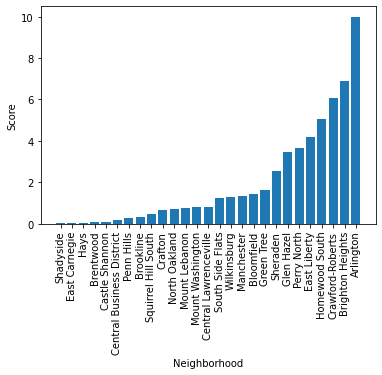

In [7]:
plt.bar(range(len(mapped)), list(mapped.values()), align='center')
plt.xticks(range(len(mapped)), list(mapped.keys()), rotation =90)
plt.xlabel("Neighborhood")
plt.ylabel("Score")
plt.show()

##### We create a smaller dictionary to hold the lowest 5 values to make a bar graph showing the neighborhoods with the lowest amount of condemned properties.

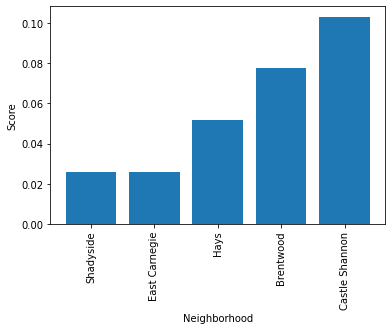

In [8]:
graph = {}

counter = 0 # only add top 5 winners
for atm in mapped:
    graph[atm] = mapped.get(atm)
    counter += 1
    if counter >= 5:
        break



plt.bar(range(len(graph)), list(graph.values()), align='center')
plt.xticks(range(len(graph)), list(graph.keys()), rotation =90)
plt.xlabel("Neighborhood")
plt.ylabel("Score")
plt.show()

##### In conclusion, I found that based on condemned properties, Arlington is the worst neighborhood to live. Since my data set only includes places where there are condemned properties, any neighborhood that isnt in my graph is actually better than even the neighborhoods with a low score.